<a href="https://colab.research.google.com/github/michaelengh/ProjectOne/blob/main/Copy_of_07___Project_1_Part_6_Final_Resubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
set_config(display='diagram')

In [ ]:
# Data set
salesfile = '/content/drive/MyDrive/**Coding Dojo**/02 Week 2: Pandas/Files for Lessons/sales_predictions.csv'
df = pd.read_csv(salesfile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


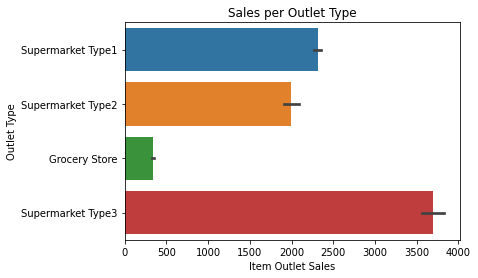

In [ ]:
# barplot using outlet type and item outlet sales
sns.barplot(data=df, x='Item_Outlet_Sales', y='Outlet_Type')
plt.title('Sales per Outlet Type')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Outlet Type')
plt.show()

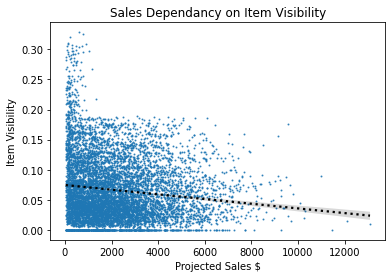

In [ ]:
# plot using item visibility and item outlet sales
ax = sns.regplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', scatter_kws={'s':1}, line_kws = dict(color='black', ls=':'))
ax.set(title='Sales Dependancy on Item Visibility', xlabel='Projected Sales $', ylabel='Item Visibility');

In [ ]:
#X = df.drop('Item_Outlet_Sales', axis=1)
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# replace tiers with numbers
Out_Loc_Type = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace(Out_Loc_Type)

In [ ]:
# create my 2 lists of data types for modeling
categoricals = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
numericals = ['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Visibility']

In [ ]:
# scaler and ohe import
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

scaler = StandardScaler()
scalertwo = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
# create pipelines
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [ ]:
# create tuples
num_tuple = (num_pipe, numericals)
cat_tuple = (cat_pipe, categoricals)

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')

# Final - Part 1

In [ ]:
# import linearregresion model 
reg = LinearRegression()

In [ ]:
# create linearregresion pipeline and fit to test train
reg_pipe = make_pipeline(preprocessor , reg)

In [ ]:
reg_pipe.fit(X_train , y_train)

In [ ]:
train_score = reg_pipe.score(X_train, y_train)
test_score = reg_pipe.score(X_test, y_test)

In [ ]:
# fetch predictions
train_preds = reg_pipe.predict(X_train)
test_preds = reg_pipe.predict(X_test)

In [ ]:
# get r2 scores
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
print(r2_train)
print(r2_test)

0.5616703858400938
0.5669871770662889


In [ ]:
# get rmse scores
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

1138.9543788442363
1093.0107702137034


# Final - Part 2

In [ ]:
# set up Decision Tree Regressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
# make pipeline for tree
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [ ]:
# fit to train
dec_tree_pipe.fit(X_train, y_train)

In [ ]:
train_preds_dec = dec_tree_pipe.predict(X_train)
test_preds_dec = dec_tree_pipe.predict(X_test)

In [ ]:
#print dec tree scores
train_dec_score = dec_tree_pipe.score(X_train, y_train)
test_dec_score = dec_tree_pipe.score(X_test, y_test)
print(train_dec_score)
print(test_dec_score)

1.0
0.1869385434817259


In [ ]:
r2_train = r2_score(y_train, train_preds_dec)
r2_test = r2_score(y_test, test_preds_dec)
print(r2_train)
print(r2_test)

1.0
0.1869385434817259


In [ ]:
rmse_train_dec = np.sqrt(mean_squared_error(y_train, train_preds_dec))
rmse_test_dec = np.sqrt(mean_squared_error(y_test, test_preds_dec))
print(rmse_train_dec)
print(rmse_test_dec)

4.925864104892086e-15
1497.7376579778304


# Final Step 3

judging off the 2 models i would choose the Linear Regression model. The linear regression model at least has a common bias and variance between the training data and the testing data, so at least I know my models are having the same outcome based off the prediction scores.